In [3]:
import requests
import pandas as pd
import json
import re
from bs4 import BeautifulSoup

city = 'newyork/'

url = 'https://www.zillow.com/homes/for_sale/'+city

headers = headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'ocnbot',
    'From' : 'ocn@nyu.edu'
}

with requests.Session() as s:
    resp = s.get(url, headers=headers)
   
    data1 = json.loads(re.search(r'!--(\{"queryState".*?)-->', resp.text).group(1))


data_list = [data1]

df = pd.DataFrame()

def generate_dataframe(frame):
    for i in data_list:
        for item in i['cat1']['searchResults']['listResults']:
            frame = pd.concat([frame,pd.json_normalize(item)],ignore_index=True)
    return frame

df = generate_dataframe(df)


print('shape:', df.shape)
display(df[['id','beds','baths','area','price']].head(20))

shape: (40, 88)


,id,beds,baths,area,price
0,31820549,3,1.0,1848,"$364,900"
1,32268242,5,2.0,2548,"$114,900"
2,30951877,3,1.0,1416,"$139,900"
3,30912133,4,2.0,1296,"$159,900"
4,30924793,3,2.0,1332,"$169,900"
5,30947564,3,2.0,1809,"$174,900"
6,31483407,3,2.0,1769,"$125,000"
7,31717011,3,3.0,1782,"$209,900"
8,31030596,4,2.0,1769,"$249,000"
9,29678588,3,2.0,1850,"$285,000"


In [23]:
url = 'https://www.nj.gov/nj/gov/direct/njzips.html'
res = requests.get(url)
dom = BeautifulSoup(res.text)
ooo = dom.select('[width="15%"]')[1:]
nj_zip_codes = list({o.text for o in ooo})

In [123]:
big_data = pd.DataFrame()
with requests.Session() as s:
    for zip_code in nj_zip_codes:
        url = 'https://www.zillow.com/homes/for_sale/'+zip_code

        headers = headers = {
            'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
            'accept-encoding': 'gzip, deflate, br',
            'accept-language': 'en-US,en;q=0.8',
            'upgrade-insecure-requests': '1',
            'user-agent': 'ocnbot',
            'From' : 'ocn2006@nyu.edu'
        }

        resp = s.get(url, headers=headers)
        print(url)

        data1 = json.loads(re.search(r'!--(\{"queryState".*?)-->', resp.text).group(1))


        data_list = [data1]

        df = pd.DataFrame()

        def generate_dataframe(frame):
            try:
                for i in data_list:
                    for item in i['cat1']['searchResults']['listResults']:

                        #frame = frame.append(item, ignore_index=True)
                        frame = pd.concat([frame,pd.json_normalize(item)],ignore_index=True)
                return frame
            except:
                return 0

        df = generate_dataframe(df)
        try:
            big_data = pd.concat([big_data,df],ignore_index=True)
        except:
            print('bad at',nj_zip_codes.index(zip_code))
            pass
print('shape:', big_data.shape)
display(big_data[['id','beds','baths','area','price']].head())

https://www.zillow.com/homes/for_sale/07205


AttributeError: 'NoneType' object has no attribute 'group'

In [110]:
print(nj_zip_codes.index('07701'),len(nj_zip_codes))

24 737


In [111]:
print((len(big_data)/24)*737)

18824.208333333336


In [72]:
len(big_data.columns)

102

In [95]:
big_data.to_csv('small_zillow_info.csv')

In [98]:
cols = list(big_data.columns)

In [99]:
cols

['zpid',
 'id',
 'providerListingId',
 'imgSrc',
 'hasImage',
 'detailUrl',
 'statusType',
 'statusText',
 'countryCurrency',
 'price',
 'unformattedPrice',
 'address',
 'addressStreet',
 'addressCity',
 'addressState',
 'addressZipcode',
 'isUndisclosedAddress',
 'beds',
 'baths',
 'area',
 'isZillowOwned',
 'badgeInfo',
 'isSaved',
 'isUserClaimingOwner',
 'isUserConfirmedClaim',
 'pgapt',
 'sgapt',
 'zestimate',
 'shouldShowZestimateAsPrice',
 'has3DModel',
 'hasVideo',
 'isHomeRec',
 'brokerName',
 'hasAdditionalAttributions',
 'isFeaturedListing',
 'availabilityDate',
 'list',
 'relaxed',
 'latLong.latitude',
 'latLong.longitude',
 'variableData.type',
 'variableData.text',
 'hdpData.homeInfo.zpid',
 'hdpData.homeInfo.streetAddress',
 'hdpData.homeInfo.zipcode',
 'hdpData.homeInfo.city',
 'hdpData.homeInfo.state',
 'hdpData.homeInfo.latitude',
 'hdpData.homeInfo.longitude',
 'hdpData.homeInfo.price',
 'hdpData.homeInfo.bathrooms',
 'hdpData.homeInfo.bedrooms',
 'hdpData.homeInfo.h

In [102]:
# needs some refining like implementation of variable to decide how to sort legend




def sp_plot_according_to_(x,df,lon,lat,title='',legend_sort_key = None):
    from matplotlib import pyplot as plt
    import matplotlib.patches as mpatches
    import numpy as np
    locations = df[[lon,lat]].copy()
    plotted = x
    locations = locations.join(x)
    for col in locations.columns:
        # does not get rid of all nulls?
        locations = locations[[pd.notnull(ele) for ele in locations[col].values]]
    # any longitudinal or latitudinal value of zero is inconsistent with the data and is therefore a null value that must be removed
    locations = locations[[ele!=0 for ele in locations[lon].values]]
    locations = locations[[ele<-73.5 for ele in locations[lon].values]]
    locations = locations[[ele!=0 for ele in locations[lat].values]]
    locations = locations[[ele>38 for ele in locations[lat].values]]

    latitude = [ele for ele in locations[lat].values]
    longitude = [ele for ele in locations[lon].values]

    colors = ['yellow','orange','red','green','purple']

    counties = list(locations.iloc[:,-1].unique())

    import random
    get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
    colors = get_colors(len(counties)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0']
    
    if(legend_sort_key==None):
        boroughs = sorted(list(locations.iloc[:,-1].value_counts().index), reverse = True)
    else:
        boroughs = sorted(list(locations.iloc[:,-1].value_counts().index),key = legend_sort_key, reverse = True)
    
    
    cmap = [colors[boroughs.index(ele)] for ele in locations.iloc[:,-1]]
    plt.scatter(longitude,latitude, c = cmap,  s=4)
    plt.title(title)
    plt.xlabel("LONGITUDE")
    plt.ylabel("LATITUDE")
    plt.legend(handles=[mpatches.Patch(color=colors[i], label=boroughs[i])for i in range(len(boroughs))],
              bbox_to_anchor=(1, 1))
    plt.show()

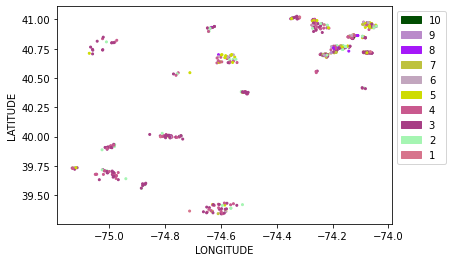

In [105]:
sp_plot_according_to_(x = big_data['beds'].copy(), df = big_data, lat = 'hdpData.homeInfo.latitude', lon = 'hdpData.homeInfo.longitude')

In [133]:
zesty = big_data[['hdpData.homeInfo.zestimate','price']]

In [130]:
big_data = pd.read_csv('small_zillow_info.csv')

In [188]:
super_ = zesty[zesty.iloc[:,0].notna()]
duper =  super_[super_.iloc[:,0] - super_.iloc[:,1]]

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [184]:
super_.iloc[:,1] = super_.iloc[:,1].map(lambda x: numericize(x))

/var/folders/tc/5j2qyb8s4t76fc3t5ycfwvl40000gn/T/ipykernel_7430/6551257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_.iloc[:,1] = super_.iloc[:,1].map(lambda x: numericize(x))


In [162]:
import re

In [191]:
super_.iloc[:,0]

7      357500.0
9      205100.0
12     416600.0
18     422500.0
29     867900.0
         ...   
601    411491.0
602    350200.0
604    354100.0
606    283200.0
612    252300.0
Name: hdpData.homeInfo.zestimate, Length: 187, dtype: float64

In [183]:
def numericize(txt):
    if isinstance(txt, str):
        return float(''.join([digit for digit in txt if digit.isnumeric()]))
    else: 
        return txt

In [204]:
super_.index = list(range(len(super_)))

yo = super_.iloc[:,0]

bo = super_.iloc[:,1]

In [205]:
bo.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            177, 178, 179, 180, 181, 182, 183, 184, 185, 186],
           dtype='int64', length=187)

In [208]:
[x for x in yo if type(x) == 'float64']

[]